####  Optimization of simple (dummy) circuit in order to map |0> -> |1>

In [1]:
import math as m
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter
from qiskit import Aer, execute , __version__ as qver
from qiskit.tools.visualization import plot_bloch_multivector, iplot_bloch_multivector

import pennylane as qml
import torch

In [2]:
print('Qiskit version: '  + qver)
print('Pennylane version: '  + qml.__version__)
print('torch version: '  + torch.__version__)

Qiskit version: 0.14.1
Pennylane version: 0.9.0
torch version: 1.1.0


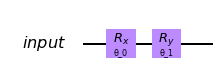

In [3]:
## Create Device/Simulator
dev = qml.device('qiskit.aer', wires=1, backend='qasm_simulator')

## Create Wires/Qubits
qreg = QuantumRegister(1, 'input')
circ = QuantumCircuit(qreg)

## Create Variational Circuit
theta_0 = Parameter('θ_0')
theta_1 = Parameter('θ_1')

circ.rx(theta_0, 0)
circ.ry(theta_1, 0)

#circ.measure(0,0) The Measure instruction is not supported by PennyLane

circ.draw(output='mpl')

In [4]:
## Create a Quantum Node for qiskit's circuit

@qml.qnode(dev)
def quantum_circuit(x_0, x_1):
    qml.from_qiskit(circ)({theta_0: x_0, theta_1: x_1})
    return qml.expval(qml.PauliZ(0))

In [5]:
## Quantum Circuit Output (Example)

print(quantum_circuit(m.pi/8, m.pi/3))

0.455078125


In [6]:
## Quantum Circuit Gradient (Example)

dcircuit = qml.grad(quantum_circuit, argnum=[0, 1])
print(dcircuit(m.pi/8, m.pi/3))

(array(-0.22460938), array(-0.79980469))


In [7]:
quantum_circuit_torch = quantum_circuit.to_torch()

In [8]:
## Define Cost Function (Simple Minimization of Output)

def cost(th0, th1):
    return quantum_circuit_torch(th0, th1)

In [9]:
## Define Variables
th_0 = torch.tensor(0.03, requires_grad=True)
th_1 = torch.tensor(0.05, requires_grad=True)

## Define Optimizer
opt = torch.optim.Adam([th_0, th_1], lr = 0.1)

[1] loss: 0.998


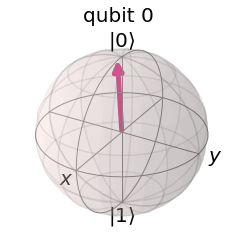

[2] loss: 0.979
[3] loss: 0.955
[4] loss: 0.912
[5] loss: 0.854
[6] loss: 0.752
[7] loss: 0.648
[8] loss: 0.537
[9] loss: 0.475
[10] loss: 0.408
[11] loss: 0.285
[12] loss: 0.191
[13] loss: 0.088
[14] loss: 0.061
[15] loss: 0.061
[16] loss: -0.088
[17] loss: 0.023
[18] loss: -0.016
[19] loss: 0.008
[20] loss: 0.016
[21] loss: 0.059
[22] loss: 0.047
[23] loss: 0.053
[24] loss: 0.076
[25] loss: 0.066
[26] loss: 0.086


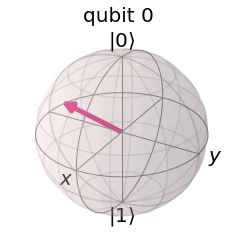

[27] loss: 0.039
[28] loss: -0.018
[29] loss: 0.049
[30] loss: 0.062
[31] loss: -0.014
[32] loss: -0.078
[33] loss: -0.092
[34] loss: -0.092
[35] loss: -0.107
[36] loss: -0.113
[37] loss: -0.148
[38] loss: -0.188
[39] loss: -0.199
[40] loss: -0.252
[41] loss: -0.342
[42] loss: -0.412
[43] loss: -0.494
[44] loss: -0.633
[45] loss: -0.680
[46] loss: -0.771
[47] loss: -0.857
[48] loss: -0.928
[49] loss: -0.971
[50] loss: -0.992
[51] loss: -0.996


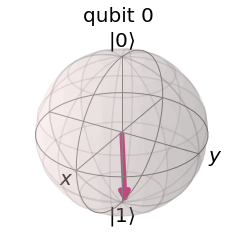

[52] loss: -0.992
[53] loss: -0.971
[54] loss: -0.945
[55] loss: -0.947
[56] loss: -0.922
[57] loss: -0.896
[58] loss: -0.904
[59] loss: -0.893
[60] loss: -0.920
[61] loss: -0.920
[62] loss: -0.926
[63] loss: -0.939
[64] loss: -0.957
[65] loss: -0.975
[66] loss: -0.984
[67] loss: -0.988
[68] loss: -0.996
[69] loss: -1.000
[70] loss: -0.998
[71] loss: -0.996
[72] loss: -0.996
[73] loss: -0.990
[74] loss: -0.990
[75] loss: -0.979
[76] loss: -0.990


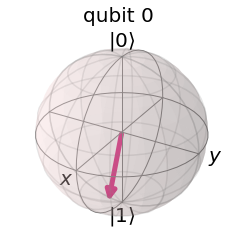

[77] loss: -0.992
[78] loss: -0.990
[79] loss: -0.988
[80] loss: -0.988
[81] loss: -0.998
[82] loss: -0.998
[83] loss: -1.000
[84] loss: -1.000
[85] loss: -1.000
[86] loss: -1.000
[87] loss: -0.998
[88] loss: -1.000
[89] loss: -1.000
[90] loss: -0.998
[91] loss: -1.000
[92] loss: -1.000
[93] loss: -0.998
[94] loss: -0.996
[95] loss: -0.994
[96] loss: -1.000
[97] loss: -0.998
[98] loss: -0.998
[99] loss: -0.998
[100] loss: -1.000
[101] loss: -1.000


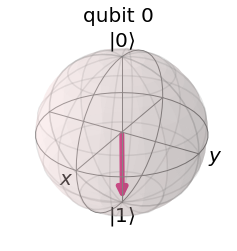

[102] loss: -1.000
[103] loss: -1.000
[104] loss: -1.000
[105] loss: -1.000
[106] loss: -1.000
[107] loss: -0.998
[108] loss: -1.000
[109] loss: -0.998
[110] loss: -0.998
[111] loss: -1.000
[112] loss: -0.998
[113] loss: -0.998
[114] loss: -1.000
[115] loss: -1.000
[116] loss: -1.000
[117] loss: -1.000
[118] loss: -1.000
[119] loss: -1.000
[120] loss: -1.000
[121] loss: -1.000
[122] loss: -0.998
[123] loss: -1.000
[124] loss: -1.000
[125] loss: -1.000
[126] loss: -1.000


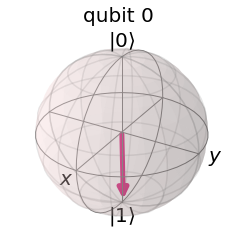

[127] loss: -1.000
[128] loss: -1.000
[129] loss: -1.000
[130] loss: -1.000
[131] loss: -1.000
[132] loss: -1.000
[133] loss: -1.000
[134] loss: -1.000
[135] loss: -1.000
[136] loss: -1.000
[137] loss: -1.000
[138] loss: -1.000
[139] loss: -1.000
[140] loss: -1.000
[141] loss: -1.000
[142] loss: -0.998
[143] loss: -1.000
[144] loss: -1.000
[145] loss: -1.000
[146] loss: -1.000
[147] loss: -1.000
[148] loss: -1.000
[149] loss: -1.000
[150] loss: -1.000


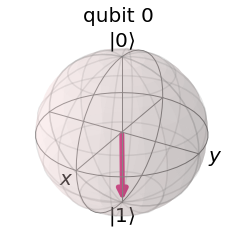

In [10]:
## Define Training Process
epochs = 150

display_bloch =  True

for epoch in range(epochs):
    opt.zero_grad()
    loss = cost(th_0, th_1)
    print('[%d] loss: %.3f' %(epoch + 1, loss))
    
    if display_bloch and (epoch%25==0 or epoch==epochs-1): # Plot Every 25 steps and the final output
        ## Plotting machine for the blochsphere output

        # Initially the state vector was on |0> state
        # We track these in order to plot the changes of state vector after the training
        backend = Aer.get_backend('statevector_simulator')
        job = execute(circ, backend, parameter_binds=[{theta_0: th_0.tolist(), theta_1: th_1.tolist()}])
        state = job.result().get_statevector(circ)
        display(plot_bloch_multivector(state))
    
    loss.backward()
    opt.step()

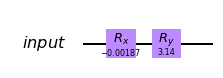

In [11]:
# Final Circuit

circ.assign_parameters({theta_0: th_0.tolist(), theta_1: th_1.tolist()}, inplace=True)
circ.draw(output='mpl', initial_state=True)